In [3]:
import os
import sys
os.path.dirname(sys.executable)

'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python37_64'

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


Import and Process Data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
data, labels = cifar10.load_data()[0]
data.shape, labels.shape

((50000, 32, 32, 3), (50000, 1))

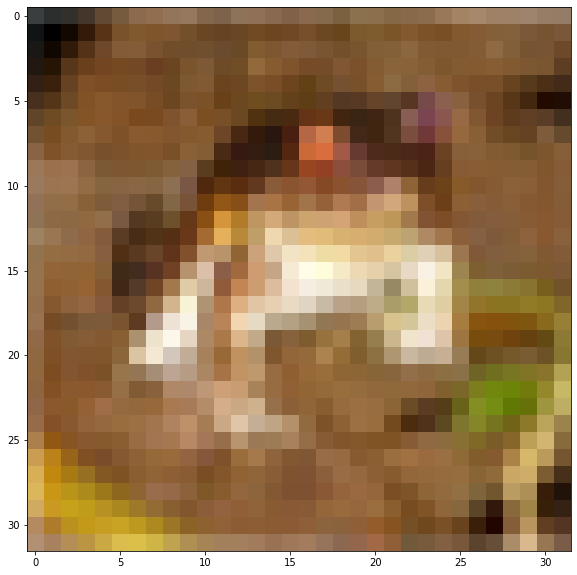

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(norm_data[0])

In [29]:
# using b&w images for simplicity
bw_data = np.mean(data, axis=3, keepdims=True)
bw_data.shape

(50000, 32, 32, 1)

In [4]:
# norm_bw_data = bw_data / 255.0
norm_data = data / 255.0

In [5]:
x_train, x_test = norm_data[:45000], norm_data[45000:]
y_train, y_test = labels[:45000], labels[45000:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (45000, 1), (5000, 1))

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 flatten_5 (Flatten)         (None, 512)              

In [29]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5538 - accuracy: 0.4340
Epoch 2/8
1407/1407 [==============================] - 33s 23ms/step - loss: 1.2400 - accuracy: 0.5578
Epoch 3/8
1407/1407 [==============================] - 37s 26ms/step - loss: 1.1059 - accuracy: 0.6080
Epoch 4/8
1407/1407 [==============================] - 24s 17ms/step - loss: 1.0114 - accuracy: 0.6432
Epoch 5/8
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9372 - accuracy: 0.6745
Epoch 6/8
1407/1407 [==============================] - 23s 16ms/step - loss: 0.8735 - accuracy: 0.6934
Epoch 7/8
1407/1407 [==============================] - 27s 19ms/step - loss: 0.8228 - accuracy: 0.7117
Epoch 8/8
1407/1407 [==============================] - 28s 20ms/step - loss: 0.7823 - accuracy: 0.7235


In [31]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_loss, val_acc

157/157 [==============================] - 1s 4ms/step - loss: 0.8728 - accuracy: 0.7018


(0.8728349804878235, 0.7017999887466431)